(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Recommender System for Amazon Electronics

In this assignment, we will be working with the [Amazon dataset](http://cs-people.bu.edu/kzhao/teaching/amazon_reviews_Electronics.tar.gz). You will build a recommender system to make predictions related to reviews of Electronics products on Amazon.

Your grades will be determined by your performance on the predictive tasks as well as a brief written report about the approaches you took.

This assignment should be completed **individually**.

## Files

**train.json** 1,000,000 reviews to be used for training. It is not necessary to use all reviews for training if doing so proves too computationally intensive. The fields in this file are:

* **reviewerID** The ID of the reviewer. This is a hashed user identifier from Amazon.

* **asin** The ID of the item. This is a hashed product identifier from Amazon.

* **overall** The rating of reviewer gave the item.

* **helpful** The helpfulness votes for the review. This has 2 subfields, 'nHelpful' and 'outOf'. The latter is the total number of votes this review received. The former is the number of those that considered the review to be helpful.

* **reviewText** The text of the review.

* **summary** The summary of the review.

* **unixReviewTime** The time of the review in seconds since 1970.

**meta.json** Contains metadata of the items:

* **asin** The ID of the item.

* **categories** The category labels of the item being reviewed.

* **price** The price of the item.

* **brand** The brand of the item.

**pairs_Rating.txt** The pairs (reviewerID and asin) on which you are to predict ratings.

**pairs_Purchase.txt** The pairs on which you are to predict whether a user purchased an item or not.

**pairs_Helpful.txt** The pairs on which you are to predict helpfulness votes. A third column in this file is the total number of votes from which you should predict how many were helpful.

**helpful.json** The review data associated with the helpfulness prediction test set. The 'nHelpful' field has been removed from this data since that is the value you need to predict above. This data will only be of use for the helpfulness prediction task.

**baseline.py** A simple baseline for each task.

## Tasks

**Rating prediction** Predict people's star ratings as accurately as possible for those (reviewerID, asin) pairs in 'pairs_Rating.txt'. Accuracy will be measured in terms of the [root mean-squared error (RMSE)](http://www.kaggle.com/wiki/RootMeanSquaredError).

**Purchase prediction** Predict given a (reviewerID, asin) pair from 'pairs_Purchase.txt' whether the user purchased the item (really, whether it was one of the items they reviewed). Accuracy will be measured in terms of the [categorization accuracy](http://www.kaggle.com/wiki/HammingLoss) (1 minus the Hamming loss).

**Helpfulness prediction** Predic whether a user's review of an item will be considered helpful. The file 'pairs_Helpful.txt' contains (reviewerID, asin) pairs with a third column containing the number of votes the user's review of the item received. You must predict how many of them were helpful. Accuracy will be measured in terms of the total [absolute error](http://www.kaggle.com/wiki/AbsoluteError), i.e. you are penalized one according to the difference |nHelpful - prediction|, where 'nHelpful' is the number of helpful votes the review actually received, and 'prediction' is your prediction of this quantity.

We set up competitions on Kaggle to keep track of your results compared to those of other members of the class. The leaderboard will show your results on half of the test data, but your ultimate score will depend on your predictions across the whole dataset.
* Kaggle competition: [rating prediction](https://inclass.kaggle.com/c/cs591-hw3-rating-prediction3) click here to [join](https://kaggle.com/join/datascience16rating)
* Kaggle competition: [purchase prediction](https://inclass.kaggle.com/c/cs591-hw3-purchase-prediction) click here to [join](https://kaggle.com/join/datascience16purchase)
* Kaggle competition: [helpfulness prediction](https://inclass.kaggle.com/c/cs591-hw3-helpful-prediction) click here to [join](https://kaggle.com/join/datascience16helpful)

## Grading and Evaluation

You will be graded on the following aspects.

* Your written report. This should describe the approaches you took to each of the 3 tasks. To obtain good performance, you should not need to invent new approaches (though you are more than welcome to) but rather you will be graded based on your decision to apply reasonable approaches to each of the given tasks. (**10pts** for each task)

* Your ability to obtain a solution which outperforms the baselines on the unseen portion of the test data. Obtaining full marks requires a solution which is substantially better (at least several percent) than baseline performance. (**10pts** for each task)

* Your ranking for each of the three tasks compared to other students in the class. (**5pts** for each task)

* Obtain a solution which outperforms the baselines on the seen portion of the test data (the leaderboard). 
(**5pts** for each task)

## Baselines

Simple baselines have been provided for each of the 3 tasks. These are included in 'baselines.py' among the files above. These 3 baselines operate as follows:

**Rating prediction** Returns the global average rating, or the user's average if you have seen them before in the training data.

**Purchase prediction** Finds the most popular products that account for 50% of purchases in the training data. Return '1' whenever such a product is seen at test time, '0' otherwise.

** Helpfulness prediction** Multiplies the number of votes by the global average helpfulness rate, or the user's rate if we saw this user in the training data.

Running 'baseline.py' produces 3 files containing predicted outputs. Your submission files should have the same format.

## Dataset Citation

**Image-based recommendations on styles and substitutes** J. McAuley, C. Targett, J. Shi, A. van den Hengel *SIGIR*, 2015

**Inferring networks of substitutable and complementary products** J. McAuley, R. Pandey, J. Leskovec *Knowledge Discovery and Data Mining*, 2015

Rating prediction:

For rating prediction I started with baseline. The baseline calculation just incorporates the users average if available. If the users average is not available the globalaverage rating is assigned. 

1) Item Rating:
The first method I took is to consider item rating without user rating, since better prediction of user-item pair rating should come from item rating. If an item has a higher average rating users are more likely to rate it highly, if the item has a lower rating the users are more likely to give it lower rating. This improved the baseline results.

2) Combination of Item and User Rating:
I tried a combination of item and user rating to give the rating prediction. For every item and user in the training set, I calculated the average rating for each user and item, and then based on these ratings I calculated the prediction rating as follows:
    If user and item both exist in training set: predictrating = (globalAverage+userAverage+itemAverage)/3
    or
    If only user in training set : predictrating = (globalAverage+userAverage)/2
    or 
    If item in training set:predictrating=(globalAverage+itemAverage/)2)
    else:
        predictrating = globalAverage

The above logic significantly improved the baseline result. Please refer to the code below.

3) Cluster the item dataset :
Tried to use neighbourhood based methods on the user-item matrix. Got the entire dataset as a matrix by mapping reviewerID and itemId to integers and storing them in a dictionary. Got a numpy array representing the utility matrix.
Could not proceed with the above step as the dataset is too huge.

4) Stochastic Gradient Descent:
The final method that I tried was Stochastic gradient descent. Using stochastic gradient descent I tried to learn the bias of the user and the bias of the item. I shuffled the training dataset, split it into test (100000)and train (900000) items. I added the regularisation factor and tried to learn underlying bias.

The above method was tried for various values of lamda. I looked into the graph of the error function and also the RMSE after each iteration of stochastic gradient descent. On my training set I could get RMSE result of 1.38 using the above method.

I also incorporated matrix factorisation into the above method:
Took two matrix of M*k and N*k (M= Total Number of Reviewers) (N= Total Number of Items). I tried various values of k and checked if I could improve the RMSE error on my test set. The value of k that worked best for me was 10. Lamba = 1. The learning rate that I used was 0.02. The RMSE error on the kaggle dataset was 1.38

The code for the method 2 and method 4 have been included below. (Method 1 is just Method 2 excluding userAverage.)




-----------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import nltk
from math import sqrt
import numpy as np
from collections import defaultdict
def readJson(f):
    for l in open(f):
        yield eval(l)

Below method considers the average rating and item average

In [5]:
allRatings = []
itemRatings = defaultdict(list)
userRatings = defaultdict(list)
for l in readJson('train.json'):
    user,item = l['reviewerID'],l['asin']
    allRatings.append(l['overall'])
    userRatings[user].append(l['overall'])
    itemRatings[item].append(l['overall'])

globalAverage = sum(allRatings) / len(allRatings)
print globalAverage
userAverage = {}
for u in userRatings:
    userAverage[u] = sum(userRatings[u]) / len(userRatings[u])

itemAverage = {}
for i in itemRatings:
    itemAverage[i] = sum(itemRatings[i])/len(itemRatings[i])

predictions = open("Fpredictions_RatingAvg.txt", 'w')

for l in open("pairs_Rating.txt"):
    if l.startswith("reviewerID"):
    #header
        predictions.write(l)
        continue
    u,i = l.strip().split('-')
    if u in userAverage:
        if i in itemAverage:
            predictions.write(u + '-' + i + ',' + str((globalAverage+userAverage[u]+itemAverage[i])/3) + '\n')
        else:
            predictions.write(u + '-' + i + ',' + str((globalAverage+userAverage[u])/2) + '\n')
    elif (i in itemAverage):
        predictions.write(u + '-' + i + ',' + str((globalAverage+itemAverage[i])/2) + '\n')
    else:
        predictions.write(u + '-' + i + ',' + str(globalAverage) + '\n')
predictions.close()

3.837538


In the below code I read the data in train.json which I have shuffled to perform gradient descent. The shuffled file is train_shuffled.json

In [6]:
allRatings = []

itemRatings = defaultdict(list)
userRatings = defaultdict(list)

for l in readJson('train_shuffled.json'):
    user,item,overall,helpful,outof,unixReviewTime = l['reviewerID'],l['asin'],float(l['overall']),float(l['helpful']['nHelpful']),float(l['helpful']['outOf']),int(l['unixReviewTime'])
    review =[user,item,overall,(helpful/outof)]
    userRatings[user].append(l['overall'])
    itemRatings[item].append(l['overall'])
    allRatings.append(review)

#completedf = pd.DataFrame(allRatings, columns = ['reviewerID','itemId','overall','helpful','outOf','unixReviewTime'])
completedf = pd.DataFrame(allRatings, columns = ['reviewerID','itemId','overall','helpful'])



The below code was used to split the dataset to train and test.

In [ ]:
'''
# We will now split our dataset in train and test. Don't run this code twice
testdf = completedf.tail(100000)
testdf.shape
completedf.shape
completedf = completedf.head(900000)
completedf.shape
'''

In [7]:
# We will build a dictionary for our dataset. We convert each itemid and userid to int values
userIdDict = {}
itemIdDict = {}
usercount=0
itemcount=0
uniqueuser = completedf.reviewerID.unique()
for reviewerID in uniqueuser:
    userIdDict[reviewerID]=usercount
    usercount+=1
    
uniqueitem = completedf.itemId.unique()
for itemID in uniqueitem:
    itemIdDict[itemID]=itemcount
    itemcount+=1

completedf['reviewerID'] = completedf['reviewerID'].apply(lambda x:int(userIdDict[x]))
completedf['itemId'] = completedf['itemId'].apply(lambda x:int(itemIdDict[x]))

In [8]:
usersize = len(userIdDict)
itemsize = len(itemIdDict)
print usersize
print itemsize

509678
171185


Here I initialize all the values for stochastic gradient descent. I have repeatedly executed the code from here to end of RMSE function(The following lines of code represent a single execution) to check for different values so as to be able to get good results.

In [9]:
k=10
bu = np.random.rand(usersize)
bi = np.random.rand(itemsize)
pu = np.random.rand(usersize,k)
qi = np.random.rand(itemsize,k)
lamda = 0.002
learningrate = 0.02
errorlist = []
print pu.shape
print qi.shape
qi = qi.T
print qi.shape
print bu[0:5]
print bi[0:5]
print pu[0,:]
print qi[:,0]

(509678, 10)
(171185, 10)
(10, 171185)
[ 0.00448453  0.66157183  0.29305201  0.17239977  0.13005402]
[ 0.74133357  0.26111768  0.7235812   0.46201906  0.1985966 ]
[ 0.87313817  0.55075304  0.73461606  0.71771175  0.32569459  0.6661297
  0.11608855  0.57858375  0.04493875  0.62666215]
[ 0.57575296  0.02546309  0.29962361  0.27053995  0.43922597  0.24309991
  0.00471176  0.36808753  0.97094418  0.138595  ]


I repeatedly run the code below checking the error graph which has been shown below. The number of times to repeat the
the stochastic gradient descent is decided based on the error and the RMSE error. I have only included the final code
that will learn on the entire dataset, while testing I have split my train dataset to change factors such as lambda,
learning rate, k and to see its impact on error graph and RMSE. I have commented the code to include Matrix Factorisation. I have tried both the methods and since I did not get major improvement on the prediction including matrix factorisation and since it increases the running time, it has been commented. The code could be run by uncommenting.

In [31]:
#def stochastic_gradient_descent():
learningrate = 0.02
for i in range(5):
    errorlist = []
    globalAverage = 3.837538
    for i in range(len(completedf)):
        userid = completedf['reviewerID'][i]
        itemid = completedf['itemId'][i]
        error = completedf['overall'][i]-(globalAverage+bu[userid]+bi[itemid])#+np.dot(pu[userid,:],qi[:,itemid])
        bu[userid]=bu[userid]+(learningrate*(error-(lamda*bu[userid])))
        bi[itemid]=bi[itemid]+(learningrate*(error-(lamda*bi[itemid])))
        #qcol = qi[:,itemid]+(learningrate*(error*pu[userid,:]-lamda*qi[:,itemid]))
        #prow = pu[userid,:]+(learningrate*(error*qi[:,itemid]-lamda*pu[userid,:]))
        #qi[:,itemid]=qcol
        #pu[userid,:]=prow
        errorlist.append(error)

The below code averages the error of the SGD and see how it decreases. This is used to judge convergence.

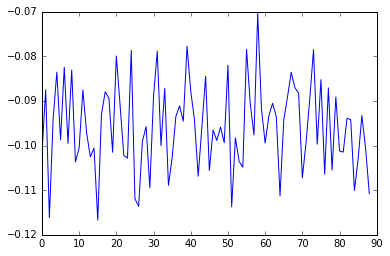

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
initial = 0
averageerror = []
for i in range(1,90):
    final = i*10000
    average = sum(errorlist[initial:final])/10000
    averageerror.append(average)
    initial = final
plt.plot(averageerror)
plt.show()

In [12]:
def getRMSE(df):
    df['error']=(df['prediction']-df['overall'])
    df['error']=df['error'].apply(lambda x:x*x)
    RMSE = sqrt((sum(df['error']))/float(len(df)))
    print RMSE

In [19]:
def getPrediction(test_df):
    ratinglist = []
    globalAverage = 3.837538
    for i in range(len(test_df)):
        userid = test_df['reviewerID'][i]
        itemid = test_df['itemId'][i]
        if userid in userIdDict and itemid in itemIdDict:
            rating = globalAverage+bu[userIdDict[userid]]+bi[itemIdDict[itemid]]#+np.dot(pu[userIdDict[userid],:],qi[:,itemIdDict[itemid]])
        #elif itemid in uniqueitem:
           # rating = globalAverage+bi[itemIdDict[itemid]]
        #elif userid in uniqueuser:
            #rating = globalAverage+bu[userIdDict[userid]]
        else:
            rating = globalAverage
        ratinglist.append(rating)
    test_df['prediction'] = ratinglist
    return test_df['prediction']

In [37]:
predictions = open("predictions_Ratingsgd.txt", 'w')
pairs_Rating = []
for l in open("pairs_Rating.txt"):
    if l.startswith("reviewerID"):
    #header
        predictions.write(l)
        continue
    u,i = l.strip().split('-')
    pairs_Rating.append([u,i])
    #predictions.write(u + '-' + i + ',' + str(completedf['']) + '\n')
testrating = pd.DataFrame(pairs_Rating,columns=['reviewerID','itemId'])
testrating['prediction'] = getPrediction(testrating)
for i in range(len(testrating['prediction'])):
    predictions.write(str(testrating['reviewerID'][i]) + '-' + str(testrating['itemId'][i]) + ',' + str(testrating['prediction'][i]) + '\n')

predictions.close()

# PREDICT HELPFULNESS


To predict the helpfullness I used the following methods:
    
1) Linear Regression:
I tried to use linear regression to check if there is a relationship  between the rating given by the user for
a particular item in the review and the average rating of the item. Ideally a users rating would reflect his review and if a users rating is too different from the average rating given by other users, this might mean that the review is not helplful.
I took the deviation of the users rating from the average rating. I plotted the deviation of the user vs the helpfulness of the rating. From the scatter plot and linear regression, I obtained the regression coefficient and based on this value, I tried to predict the rating helpfulness of the review.
The above method returned worst results.

2) Prediction based on useraverage and itemaverage:
The second method I tried was to use userAverage and itemAverage to predict the users helpfulness. For every useritem pair, I took the average helpfulness of the user and then the average helpfulness of the item. I was able to beat the baseline with the above method.

3) Prediction based on globalAverage,itemAverage,userAverage:
The final method that I considered was to take all the three helpfulness average that is the globalaverage of helpfulness,users average helpfulness and items average helpfulness.


In [21]:
itemRatings = defaultdict(list)
userRatings = defaultdict(list)
allHelpful = []
userHelpful = defaultdict(list)
itemHelpful = defaultdict(list)

for l in readJson('train.json'):
    user,item,overall,helpful,outof,unixReviewTime = l['reviewerID'],l['asin'],float(l['overall']),float(l['helpful']['nHelpful']),float(l['helpful']['outOf']),int(l['unixReviewTime'])
    review =[user,item,overall,(helpful/outof)]
    userRatings[user].append(l['overall'])
    itemRatings[item].append(l['overall'])
    allHelpful.append(l['helpful'])
    userHelpful[user].append(l['helpful'])
    itemHelpful[item].append(l['helpful'])
    allRatings.append(review)

#completedf = pd.DataFrame(allRatings, columns = ['reviewerID','itemId','overall','helpful','outOf','unixReviewTime'])
hdf = pd.DataFrame(allRatings, columns = ['reviewerID','itemId','overall','helpful'])

In [22]:
averageRate = sum([x['nHelpful'] for x in allHelpful]) * 1.0 / sum([x['outOf'] for x in allHelpful])
userRate = {}
itemRate = {}
for u in userHelpful:
    userRate[u] = sum([x['nHelpful'] for x in userHelpful[u]]) * 1.0 / sum([x['outOf'] for x in userHelpful[u]])
for u in itemHelpful:
    itemRate[u] = sum([x['nHelpful'] for x in itemHelpful[u]]) * 1.0 / sum([x['outOf'] for x in itemHelpful[u]])

In [24]:
itemAverage = {}
diffFromItemAverage = []
for i in itemRatings:
    itemAverage[i] = sum(itemRatings[i])/len(itemRatings[i])

for i in range(len(hdf)):
    diff = abs(hdf['overall'][i]-itemAverage[hdf['itemId'][i]])
    diffFromItemAverage.append(diff)
hdf['deviation'] = diffFromItemAverage

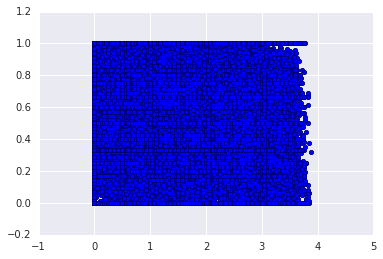

                            OLS Regression Results                            
Dep. Variable:                helpful   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                 1.376e+06
Date:                Sun, 17 Apr 2016   Prob (F-statistic):               0.00
Time:                        22:56:13   Log-Likelihood:            -1.9322e+06
No. Observations:             2000000   AIC:                         3.864e+06
Df Residuals:                 1999999   BIC:                         3.864e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
deviation      0.4252      0.000   1172.949      0.0

In [26]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import statsmodels.formula.api as smf
import pandas

import seaborn as sns
%matplotlib inline
#newdf = completedf.head(1000)
X = hdf['deviation']
y = hdf['helpful']
type(X)
type(y)
X.shape
y.shape
plt.scatter(X,y)
plt.show()
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


In the below code I find the deviation for the items in the helpful.json and based on their deviation I predict their
helpfulness.

In [27]:
helpful_info = []
predictionhelpfull = []
for l in readJson('helpful.json'):
    user,item,overall,outof= l['reviewerID'],l['asin'],float(l['overall']),float(l['outOf'])
    review =[user,item,overall,outof]
    helpful_info.append(review)
helpfuldf =  pd.DataFrame(helpful_info, columns = ['reviewerID','itemId','overall','outof'])

for i in range(len(helpfuldf)):
    if helpfuldf['itemId'][i] in itemAverage:
        deviation = abs(helpfuldf['overall'][i]-itemAverage[helpfuldf['itemId'][i]])
        predictionhelpfull.append((deviation*0.4252)*helpfuldf['outof'][i]) 
    else:
        predictionhelpfull.append(averageRate*helpfuldf['outof'][i])
helpfuldf['predicthelpful'] = predictionhelpfull



In [33]:
helpfuldf

,reviewerID,itemId,overall,outof,predicthelpful
0,3f8e4e55ed9642e497530b5782d4a34aed9703613d2779...,8939d791e9dd035aa58da024ace69b20d651cea4adf615...,1,15,11.161500
1,b587571ff6586ce380f855823e4396582ed68fe82ff429...,6116d31a297ceb0f8f69f6f71e924e47136fc70c6f5bf7...,4,2,0.141733
2,1e3497448fcff0a0155f43434b65d4773644b862fd0bb7...,13132c29b5bca0c7d8521c57179b9b73c605989314477d...,5,4,2.664587
3,359fcfd1b6d053820af1cac1f2ffef7616d318d39e86c5...,13132c29b5bca0c7d8521c57179b9b73c605989314477d...,5,11,7.327613
4,50cbcf93ce240cd355dee473773c1f37fe4cc86a837ad2...,13132c29b5bca0c7d8521c57179b9b73c605989314477d...,4,1,0.240947
5,7aecac1da7487eca44a3a3f0ef24d160586bacd3e839f8...,13132c29b5bca0c7d8521c57179b9b73c605989314477d...,1,7,7.242573
6,8599932594cdda171152ded1c626809da86dbfc66ddba9...,13132c29b5bca0c7d8521c57179b9b73c605989314477d...,5,2,1.332293
7,77c9a7fdd74e4d18be8a132e985808c7620b934c01f19b...,13132c29b5bca0c7d8521c57179b9b73c605989314477d...,2,1,0.609453
8,5a2bf85c78cd74f1f26537e1537307ffb0b66dacdf24f2...,13132c29b5bca0c7d8521c57179b9b73c605989314477d...,5,1,0.666147
9,25f6cdaf1a6febfb97b2210a5a2e46a11539a43ce7e075...,13132c29b5bca0c7d8521c57179b9b73c605989314477d...,5,1,0.666147


In [28]:
count = 0
predictions = open("predictions_Helpful_linear.txt", 'w')
for l in open("pairs_Helpful.txt"):
    if l.startswith("reviewerID"):
    #header
        predictions.write(l)
        continue
    u,i,outOf = l.strip().split('-')
    predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str((helpfuldf['predicthelpful'][count])) + '\n')
    count+=1
predictions.close()

Code for second method with averages.

In [29]:
predictions = open("predictions_Helpful_average.txt", 'w')
for l in open("pairs_Helpful.txt"):
    if l.startswith("reviewerID"):
    #header
        predictions.write(l)
        continue
    u,i,outOf = l.strip().split('-')
    outOf = int(outOf)
    if u in userRate and i in itemRate:
        predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str((outOf*userRate[u]+outOf*itemRate[i])/2) + '\n')
    elif u in userRate:
        predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(outOf*userRate[u]) + '\n')
    elif i in itemRate:
        predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(outOf*itemRate[i]) + '\n')
    else:
        predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(outOf*averageRate) + '\n')
predictions.close()

By taking a global average. This produced the best results among the above three.

In [30]:
predictions = open("predictions_Helpful_averagewithglobal.txt", 'w')
for l in open("pairs_Helpful.txt"):
    if l.startswith("reviewerID"):
    #header
        predictions.write(l)
        continue
    u,i,outOf = l.strip().split('-')
    outOf = int(outOf)
    if u in userRate and i in itemRate:
        predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str((outOf*averageRate+outOf*userRate[u]+outOf*itemRate[i])/3) + '\n')
    elif u in userRate:
        predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str((outOf*userRate[u]+outOf*averageRate)/2) + '\n')
    elif i in itemRate:
        predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str((outOf*itemRate[i]+outOf*averageRate)/2) + '\n')
    else:
        predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(outOf*averageRate) + '\n')
predictions.close()

 # Purchase prediction
    

Purchase prediction:
    
1) Using averages and fixing the sorting order
In purchase prediction I improved the baseline result by sorting the item data in decreasing order of the number of items bought. If a item has been bought frequently, then there is more likelihood of the user buying the item. This is independent of the preference of the user for the item.

I took the items that account for various percentage of the total items bought. i.e The factor to be multiplied into the totalPurchases below and arrived at different predictions for purchase. Considering the items that account for around 90% of the data gave me good results.

2) Using the prediction obtained from SGD and considering higher predicted ratings as higher likelihood of purchase
second method for the above problem would be to consider the user and item rating based on SGD. If the user-item rating is high and the item is popular then we can rate the item as bought. If the user-item rating is low or the item is not popular then we can rate the item as low. The code for the second methond has not been written. The above method was able to beat the baseline. By improving the results obtained based on SGD, this prediction could be improved.

In [34]:
itemCount = defaultdict(int)
totalPurchases = 0

for l in readJson('train.json'):
    user,item = l['reviewerID'],l['asin']
    itemCount[item] += 1
    totalPurchases += 1

mostPopular = [(itemCount[x], x) for x in itemCount]
mostPopular.sort(reverse=True)
print type(mostPopular)

<type 'list'>


In [35]:
return1 = set()
count = 0

for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > (0.9*totalPurchases): 
        break


predictions = open("predictions_Purchase.txt", 'w')
for l in open("pairs_Purchase.txt"):
    if l.startswith("reviewerID"):
        #header
        predictions.write(l)
        continue
    u,i = l.strip().split('-')
    if i in return1:
        predictions.write(u + '-' + i + ",1\n")
    else:
        predictions.write(u + '-' + i + ",0\n")
predictions.close()

In [ ]:
The following method uses the prediction based on SGD

In [36]:
predictions = open("predictions_PurchaseWithRating.txt", 'w')
pairs_Rating = []
for l in open("pairs_Purchase.txt"):
    if l.startswith("reviewerID"):
    #header
        predictions.write(l)
        continue
    u,i = l.strip().split('-')
    pairs_Rating.append([u,i])
    #predictions.write(u + '-' + i + ',' + str(completedf['']) + '\n')
testrating = pd.DataFrame(pairs_Rating,columns=['reviewerID','itemId'])
testrating['prediction'] = getPrediction(testrating)
for i in range(len(testrating['prediction'])):
    if testrating['prediction'][i] > 4 or testrating['itemId'][i] in return1:
        predictions.write(str(testrating['reviewerID'][i]) + '-' + str(testrating['itemId'][i]) + ',' + str(1) + '\n')
    else:
        predictions.write(str(testrating['reviewerID'][i]) + '-' + str(testrating['itemId'][i]) + ',' + str(0) + '\n')

predictions.close()

In [ ]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()